## Hands-on - Visualisation

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import shapiro

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
print(df.head(5))

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

### **Question 1: Create a histogram of the 'Life Ladder'**
#### Hint: Use plt.hist() or sns.histplot() to show distribution of a single variable

Missing Data Count:
 Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


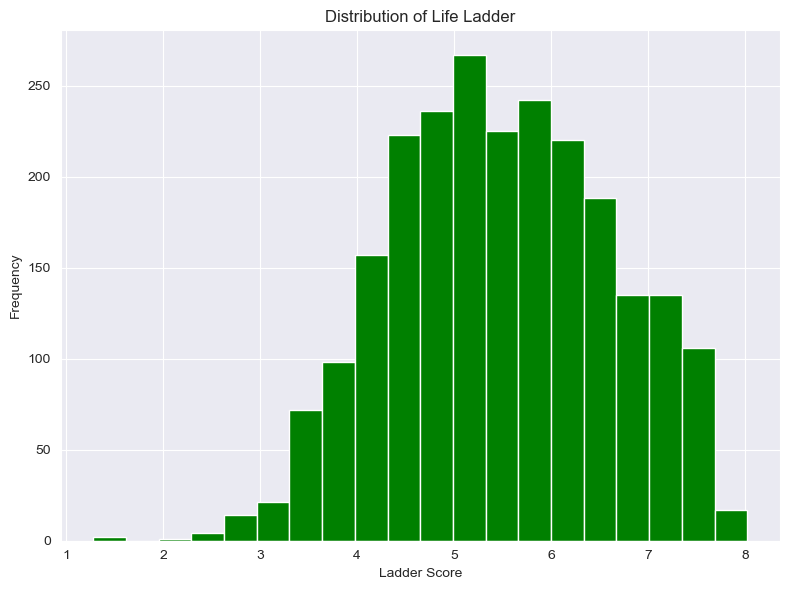

In [2]:
# Your code here:
## Handling Missing Data
missing_counts = df.isnull().sum()
print("Missing Data Count:\n", missing_counts)

# Histogram: Distribution of Freedom to Make Life Choices

plt.figure(figsize=(8, 6))  # Set the figure size

# Plot histogram with 20 bins and green color
plt.hist(df['Life Ladder'], bins=20, color='green')

# Add title and axis labels
plt.title('Distribution of Life Ladder')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### **Question 2: Create a scatter plot of 'Log GDP per capita' vs 'Life Ladder'**
#### Hint: Use sns.scatterplot(x=..., y=...) or plt.scatter()

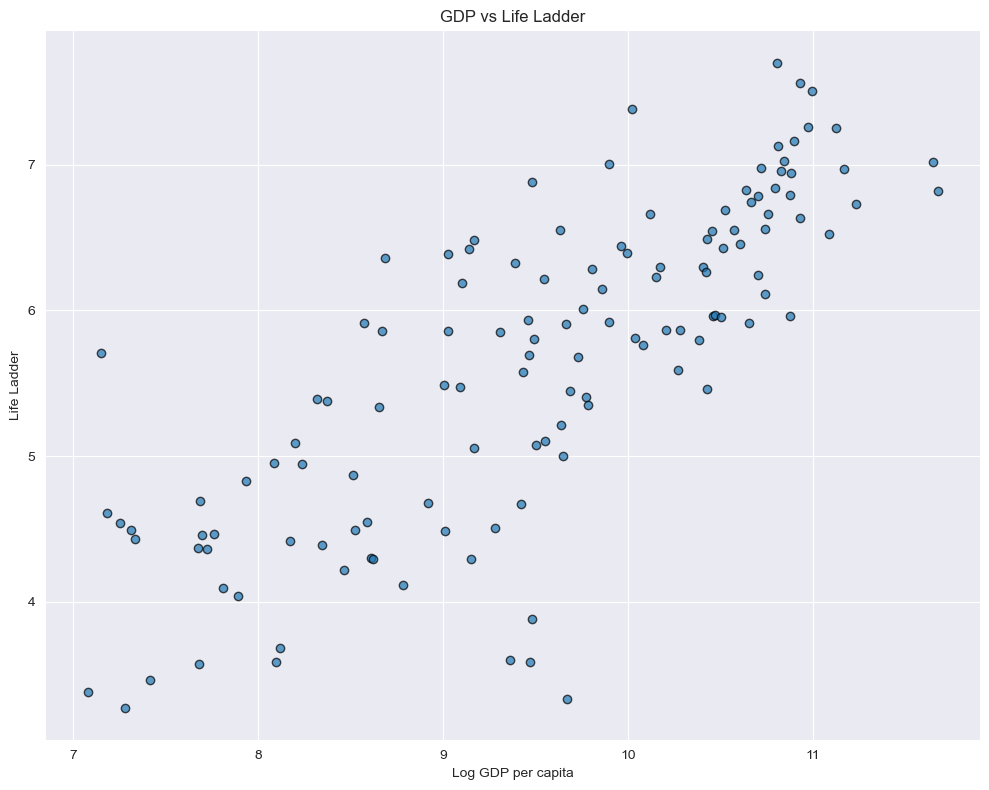

In [3]:
# Your code here:
# Scatterplot: Log GDP per Capita vs Life Ladder

plt.figure(figsize=(10, 8))  # Set the figure size

# Filter data for the latest available year
df_latest = df[df['year'] == df['year'].max()]

# Create scatterplot
plt.scatter(
    df_latest['Log GDP per capita'],
    df_latest['Life Ladder'],
    alpha=0.7,  # Set transparency for better overlap visibility
    edgecolors='black'  # Outline each point for clarity
)

# Add labels and title
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.title('GDP vs Life Ladder')

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()

### **Question 3: Create a box plot to show distribution of 'Life Ladder' by 'year'**
#### Hint: Use sns.boxplot(x='Regional indicator', y='Life Ladder', data=df) and rotate x-labels for readability

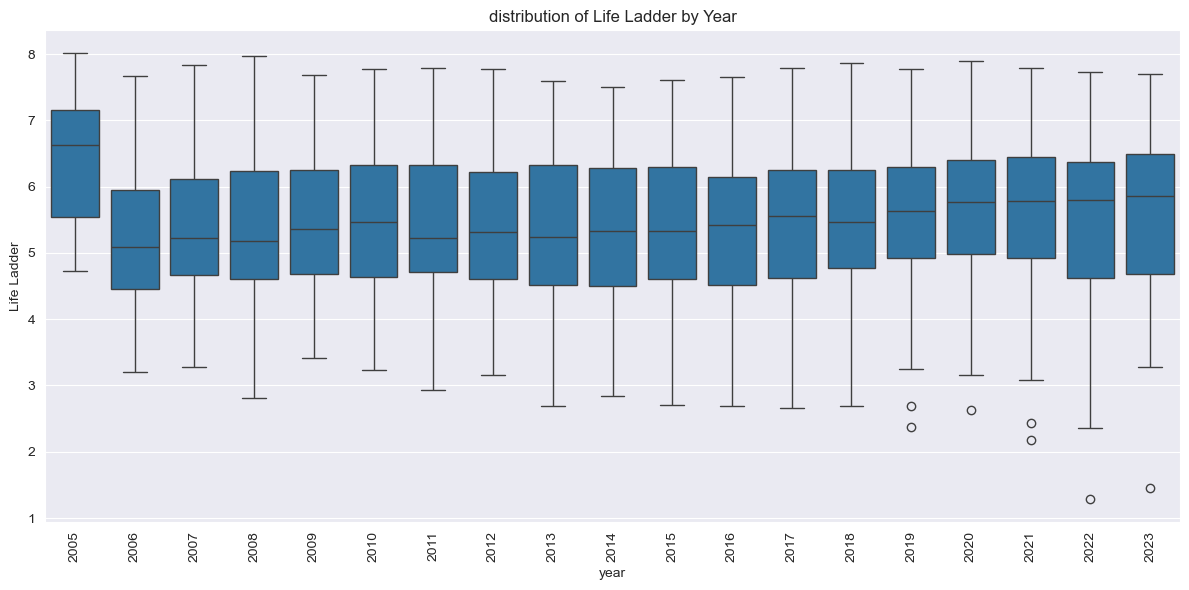

In [4]:
# Your code here:
# Boxplot: distribution of 'Life Ladder' by Year

plt.figure(figsize=(12, 6))  # Set figure size for better x-axis label spacing

# Create boxplot to show how generosity scores vary across years
sns.boxplot(x='year', y='Life Ladder', data=df)

# Add plot title
plt.title('distribution of Life Ladder by Year')

# Rotate x-axis labels for clarity
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### **Question 4: Create a heatmap to show correlation between numerical features**
#### Hint: Use df.corr() to calculate correlation matrix, then sns.heatmap()

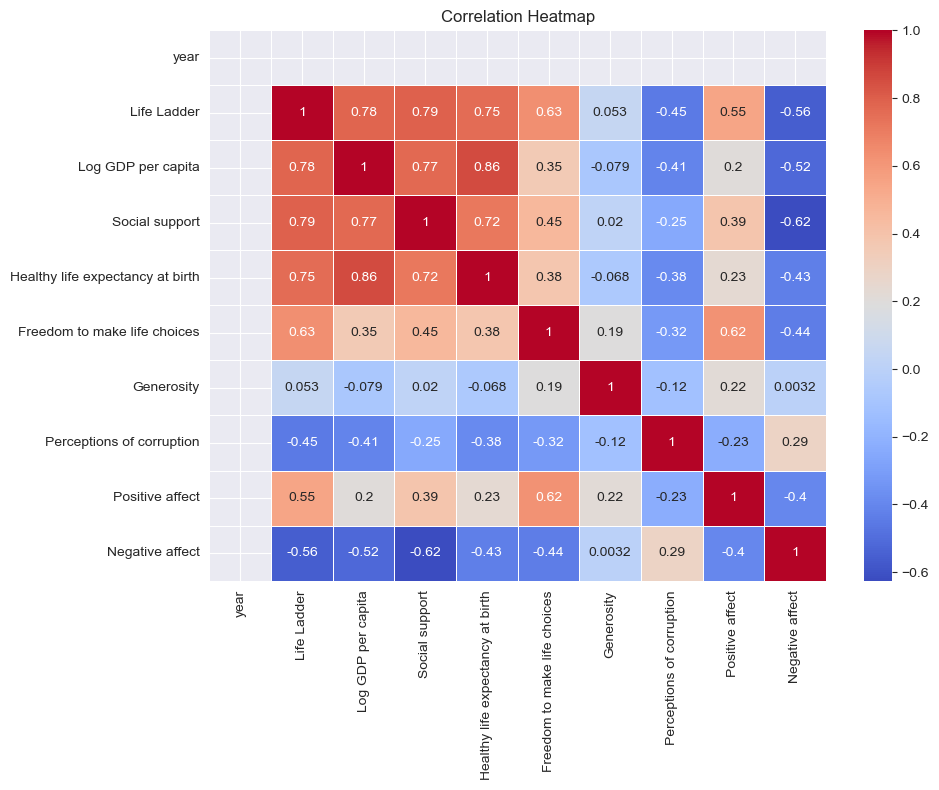

In [5]:
# Your code here:
# Correlation Heatmap: Numeric Variables for Latest Year

# Compute correlation matrix for the most recent year only
corr = df[df['year'] == df['year'].max()].select_dtypes(include='number').corr()

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Plot heatmap using Seaborn
sns.heatmap(
    corr, 
    annot=True,          # Display correlation values in each cell
    cmap='coolwarm',     # Use diverging color palette
    linewidths=0.5       # Add space between cells
)

# Add a descriptive title
plt.title('Correlation Heatmap')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

### **Question 5: Create a residual plot for 'Life Ladder' prediction using 'Log GDP per capita'**
#### Hint: Use LinearRegression to predict, then subtract predictions from actuals and plot with plt.scatter()

In [6]:
# Your code here:

### **Question 6: Create a line plot showing 'Healthy life expectancy at birth' over years for top 5 countries**
#### Hint: Group by 'Country name', take top 5 by average life expectancy, then use sns.lineplot() to show trends over time

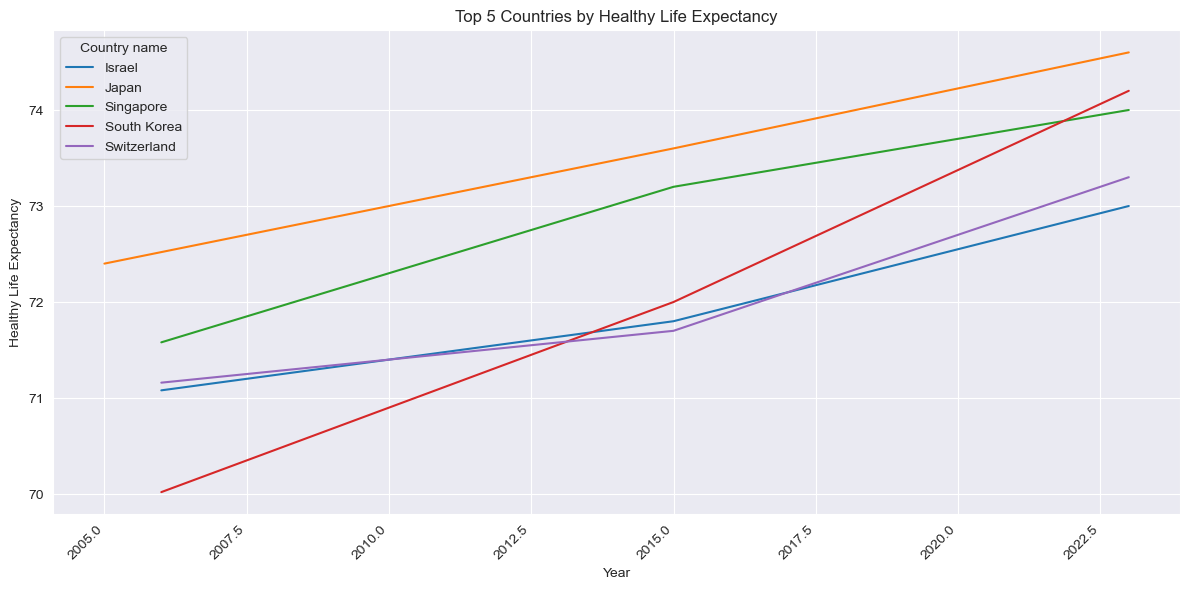

In [22]:
# Your code here:

# Plot the top 5 countries by Healthy Life Expectancy in the most recent year
avg_life_expectancy = df.groupby('Country name')['Healthy life expectancy at birth'].mean().reset_index()

# Filter over years and get top 5 countries by healthy life expectancy
top5 = avg_life_expectancy.nlargest(5, 'Healthy life expectancy at birth')['Country name'].tolist()
df_top5 = df[df['Country name'].isin(top5)]


# Set the figure size for better readability
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_top5, x = 'year', y = 'Healthy life expectancy at birth', hue = 'Country name', markers= '0')
# Line plot of countries vs. healthy life expectancy
# plt.plot(
#     top5['Country name'], 
#     top5['Healthy life expectancy at birth'], 
#     marker='o', linestyle='-', color='b'
# )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and axis labels
plt.title("Top 5 Countries by Healthy Life Expectancy")
plt.ylabel("Healthy Life Expectancy")
plt.xlabel("Year")
plt.grid(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

### **Question 7: Create a bar chart of average 'Social support' for top 10 countries in 2023**
#### Hint: Filter the dataset for 2023, group by 'Country name', then plot the top 10 using bar chart

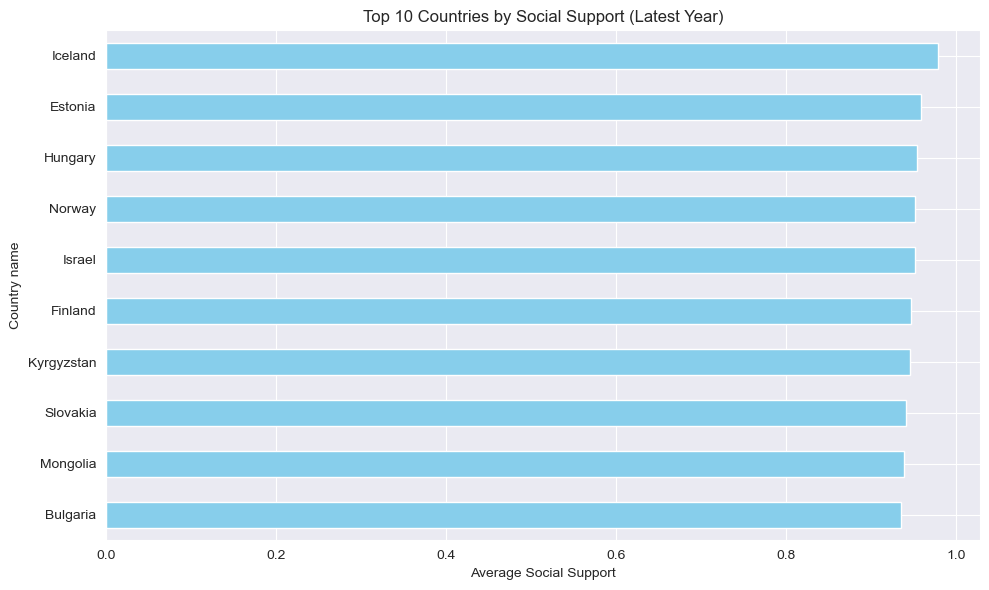

In [8]:
# Your code here:
# Plot the Top 10 Countries by Social Support (2023)

plt.figure(figsize=(10, 6))  # Set the figure size

# Filter dataset for the most recent year
df_latest = df[df['year'] == df['year'].max()]

# Calculate average social support by country and select the top 10
avg_social = df_latest.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
avg_social.plot(kind='barh', color='skyblue')

# Set axis labels and title
plt.xlabel('Average Social Support')
plt.title('Top 10 Countries by Social Support (2023)')

# Invert y-axis so highest value appears at the top
plt.gca().invert_yaxis()

# Adjust layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()

### **Question 8: Create a pie chart showing proportion of 'Country name' in the dataset (top 10 countries)**
#### Use df['Country name'].value_counts().head(10) and plt.pie() to show the most frequently appearing countries

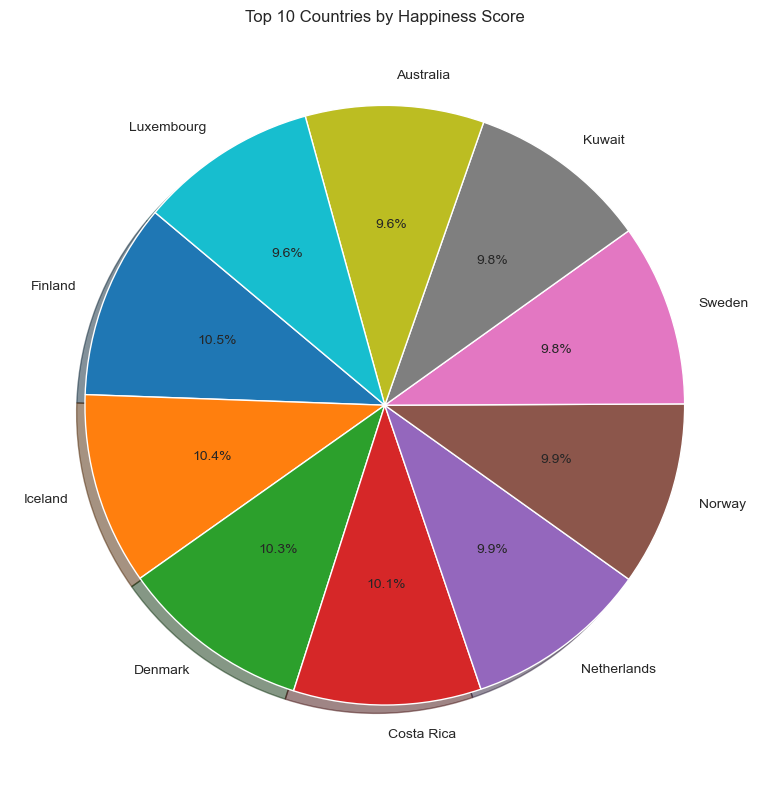

In [12]:
# Your code here:
# Select the top 10 countries with the highest Life Ladder (happiness) scores
top_happiness = df_latest.nlargest(10, 'Life Ladder')

plt.figure(figsize=(8, 8))  # Set figure size

# Create the pie chart
plt.pie(
    top_happiness['Life Ladder'],  # Values for the pie slices
    labels=top_happiness['Country name'],  # Labels for each slice
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140,  # Rotate start angle for better layout
    shadow=True  # Add shadow for visual effect
)

# Add a title
plt.title('Top 10 Countries by Happiness Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Question 9: Perform Linear Regression to predict 'Life Ladder' using multiple predictors**
#### Hint: Use 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' as X variables and fit a model

In [10]:
# Your code here:

### **Question 10: Plot residuals from the model above**
#### Hint: Subtract predicted values from actual 'Life Ladder', then plot residuals vs predictions using plt.scatter()

In [11]:
# Your code here: